In [6]:

import pandas as pd # Data analysis and manipulation 
import numpy as np # Numerical operations

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Data preparation

--> Data preparation (also referred to as “data preprocessing”) is the process of transforming raw data so that data scientists and analysts can run it through machine learning algorithms to uncover insights or make predictions.

We check for Missing values,Outliers or anomalies,Improperly formatted / structured data.

We also check data types and convert it to categorical if needed.


In [ ]:
# load the dataset
cancer_df = pd.read_csv('haberman.csv', header=None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])
print(cancer_df.head())


In [10]:
#info() explains if there are any missing values and also dtype, memory usage etc.
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            306 non-null    int64
 1   year_of_treatment              306 non-null    int64
 2   positive_lymph_nodes           306 non-null    int64
 3   survival_status_after_5_years  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


# High-level statistics

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types


In [12]:
print(cancer_df.describe())

              age  year_of_treatment  positive_lymph_nodes  \
count  306.000000         306.000000            306.000000   
mean    52.457516          62.852941              4.026144   
std     10.803452           3.249405              7.189654   
min     30.000000          58.000000              0.000000   
25%     44.000000          60.000000              0.000000   
50%     52.000000          63.000000              1.000000   
75%     60.750000          65.750000              4.000000   
max     83.000000          69.000000             52.000000   

       survival_status_after_5_years  
count                     306.000000  
mean                        1.264706  
std                         0.441899  
min                         1.000000  
25%                         1.000000  
50%                         1.000000  
75%                         2.000000  
max                         2.000000  


In [52]:
print("Number of rows: " + str(cancer_df.shape[0]))
print("Number of columns: " + str(cancer_df.shape[1]))
print("Columns: " + ", ".join(cancer_df.columns))

print("Data pointer per traget- Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))
print("data pointer per traget")


Number of rows: 306
Number of columns: 4
Columns: age, year_of_treatment, positive_lymph_nodes, survival_status_after_5_years
Data pointer per traget- Target variable distribution
1    225
2     81
Name: survival_status_after_5_years, dtype: int64
**************************************************
1    0.735294
2    0.264706
Name: survival_status_after_5_years, dtype: float64
data pointer per traget


## Observation

There are no missing values in this dataset. So there is no need
to do data imputation.

The datatype of 'survival_status_after_5_years' column is integer. It has to be converted to categorical datatype.

The values of 'survival_status_after_5_years' column are not meanigful. Hence they are mapped to 'yes' (survived after 5 years) and 'no' (not survived after 5 years)


## Objective
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

# Univariate analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 


We have plotted Distribution plots, CDF, Box plot and Violin plots

## Distribution plots

* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group


/home/ubu/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


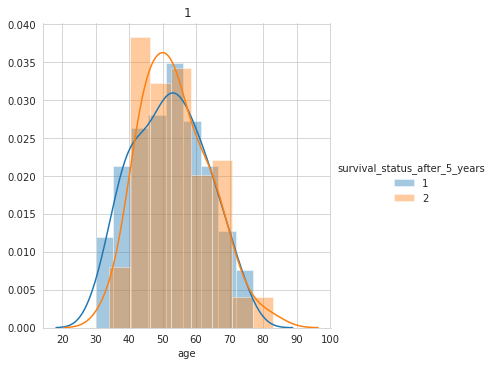

/home/ubu/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


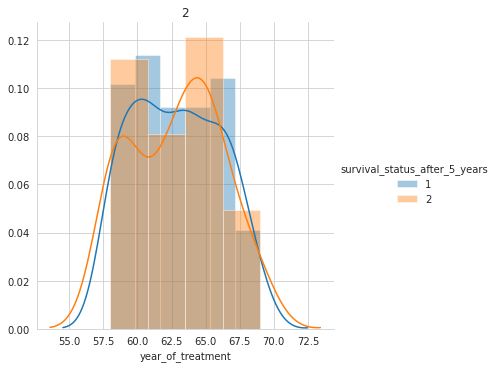

/home/ubu/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


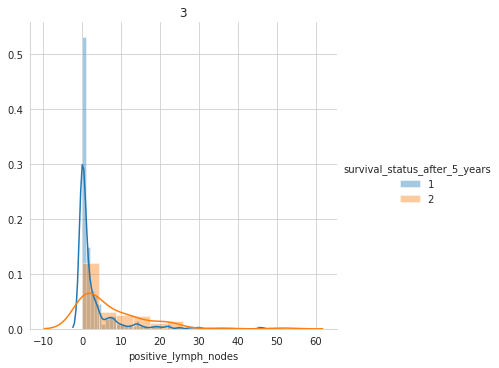

In [55]:

for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    fg = sns.FacetGrid(cancer_df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.title(idx+1)
    plt.show()


## 1
1.This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.

2.People less than age 40 are more likely to survive.
## 2
Large number of patients died whos operation was done in year 60 and 65.

## 3
We can conclude that from this histogram (axil_node) that, Patients having 0 axil nodes are more likely to survive

## CDF

The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.


********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year_of_treatment *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* positive_lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.996732

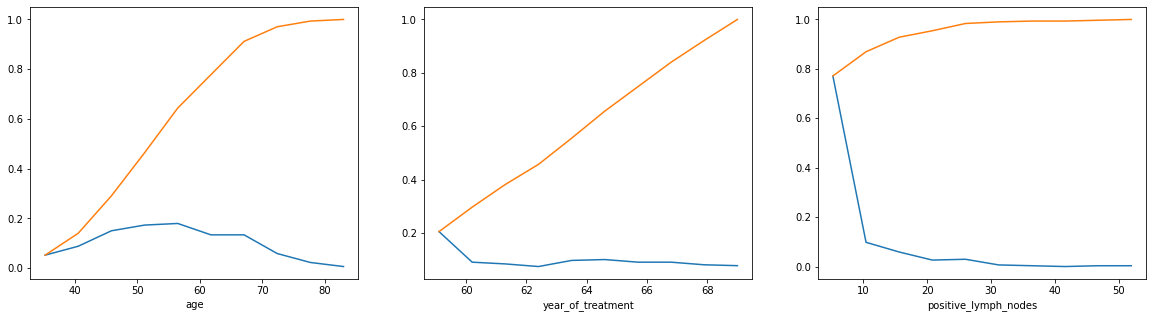

In [15]:

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(cancer_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

## Box Plots

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1


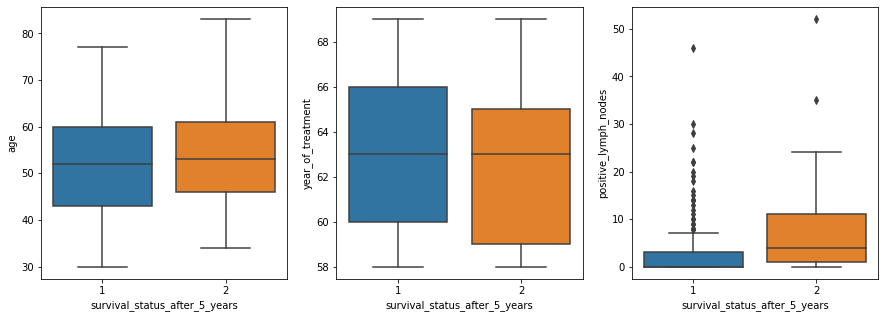

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer_df, ax=axes[idx])
plt.show()

### observations

w.r.t lymph nodes:

Box plot shows that, the more number of axil nodes, the more patients likely to die

The patients who had axil nodes from 1 to 24 are the majority of patients who died.

## Violin Plots

Violin plot is the combination of box plot and probability density function.


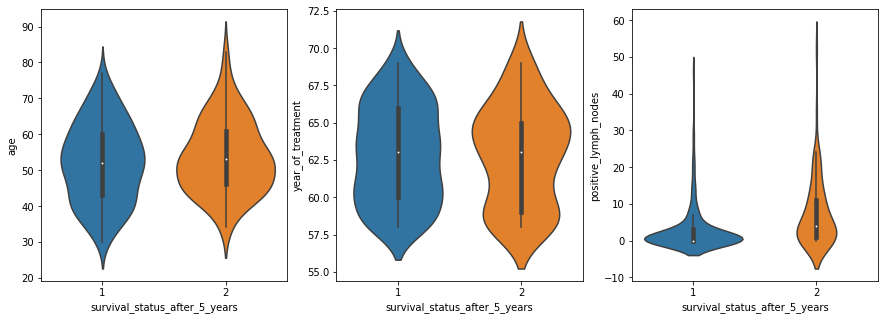

In [18]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_df.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=cancer_df, ax=axes[idx])
plt.show()

### observations

w.r.t lymph nodes:

After taking a look at violin plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.

Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.


# Bivariate Analysis
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Scatter Plot
A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

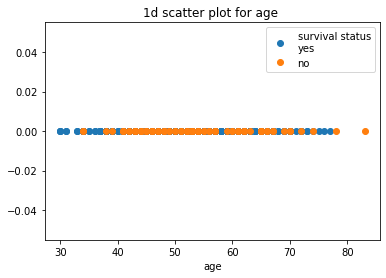

In [26]:

# 1-d scatter plot

one = cancer_df.loc[cancer_df["survival_status_after_5_years"] == 1]
two = cancer_df.loc[cancer_df["survival_status_after_5_years"] == 2]
plt.plot(one["age"], np.zeros_like(one["age"]), 'o', label ="survival status\n" "yes")
plt.plot(two["age"], np.zeros_like(two["age"]), 'o', label = "no")
plt.title("1d scatter plot for age ")
plt.xlabel("age")
plt.legend()
plt.show()


### observations

After looking at this plot we can easily count number of points that are there in age range who survived or not.
Many person died whose age was between 41-70.

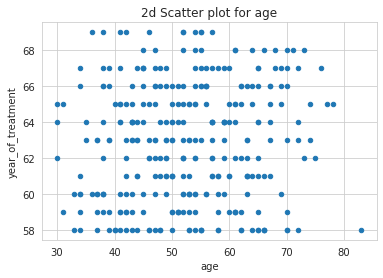

In [38]:
# 2-d scatter plot with no color coding for each class for age and year of treatment

cancer_df.plot(kind = "scatter", x = "age", y = "year_of_treatment")
plt.title("2d Scatter plot for age")
plt.show()

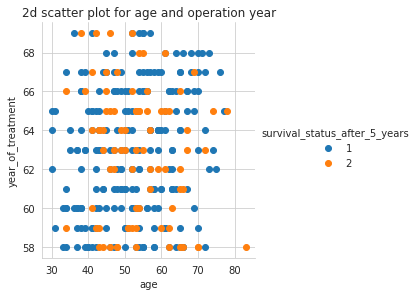

In [39]:
# 2d scatter plot with color coding for each class for age and year of treatment

sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue = "survival_status_after_5_years", size = 4).map(plt.scatter, "age", "year_of_treatment").add_legend()
plt.title("2d scatter plot for age and treatment year")
plt.show()

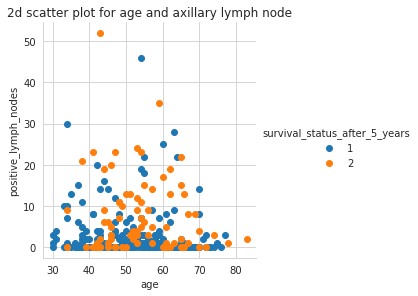

In [40]:
# 2d scatter plot for age and lymph nodes

sns.set_style("whitegrid")
sns.FacetGrid(cancer_df, hue = "survival_status_after_5_years", size = 4).map(plt.scatter, "age", "positive_lymph_nodes").add_legend()
plt.title("2d scatter plot for age and axillary lymph node")
plt.show()

### observations

In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
0-5 positive_lymph_node person survived and died as well but the died ratio is less than survive ratio.

## Pair plot


In [41]:
# To convert data from numerical type to object type

# df["survival_status"] = df["survival_status"].astype(str)
# df["survival_status"].dtype

In [42]:
# To change data from numerical into object type
# changeing the numerical variable 1 into string "survived" and 2 into "not_survived"
# Altough, we can directly pass desired no of variable to plot using vars(list of variable name) parameter. which is used below of this cell.

#df["survival_status"] = df["survival_status"].apply(lambda x : "survived" if x == 1 else "not_survived")
#df["survival_status"].dtype

/home/ubu/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


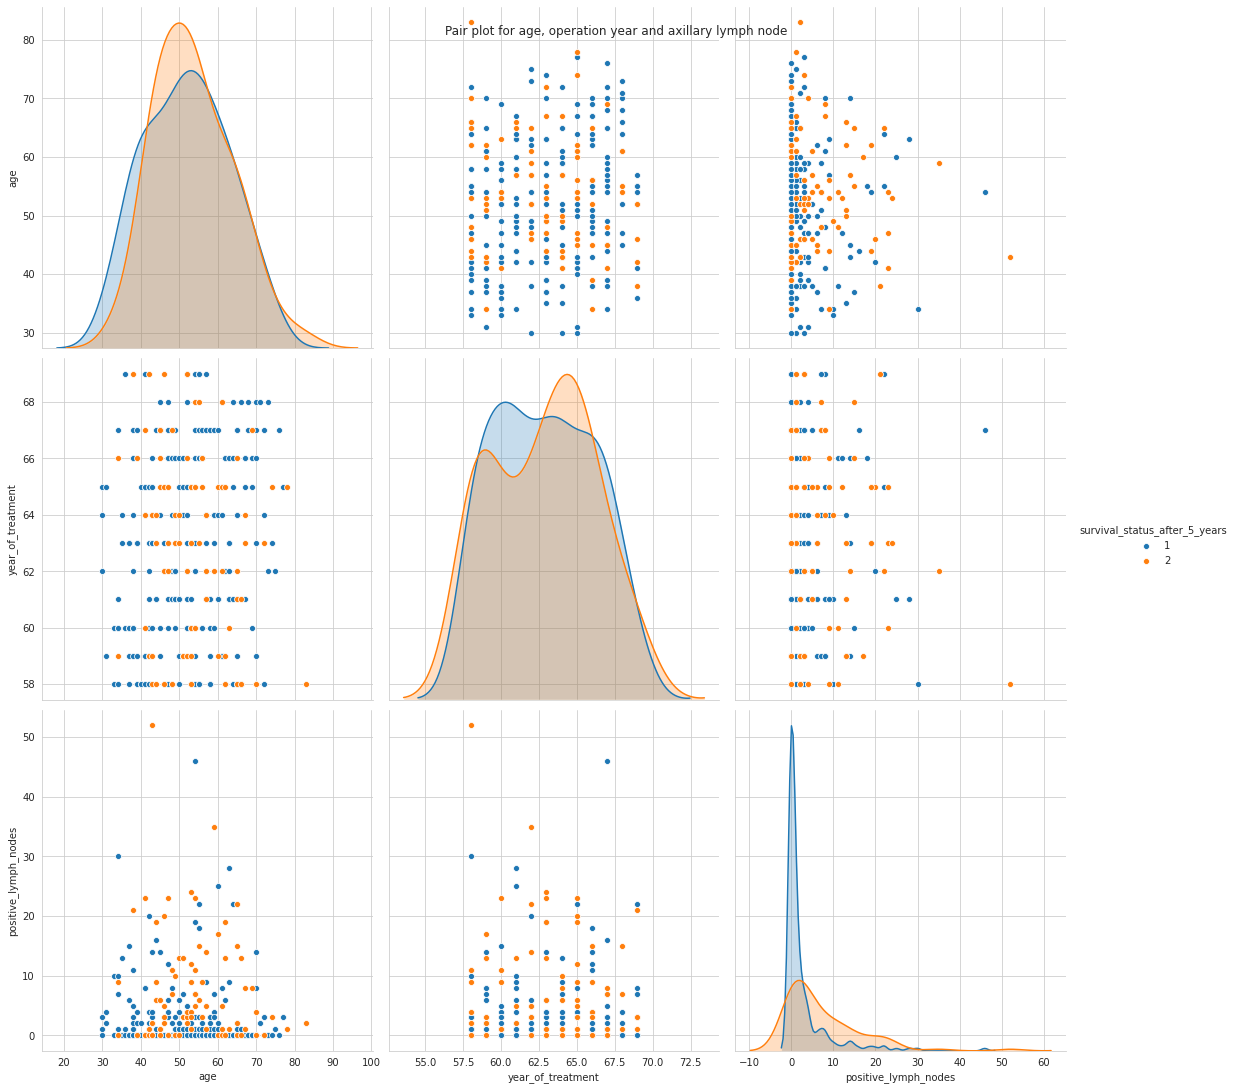

In [46]:
# We use pair plot where the dimenstionality of data is less.
# In our case we have only 4 dimension data. So, we can use pairplot.
#plt.title("pair plot for age treatment year and positive lymph node")
sns.set_style("whitegrid")
sns.pairplot(cancer_df, hue = "survival_status_after_5_years", vars = ["age", "year_of_treatment", "positive_lymph_nodes"], size = 5).fig.suptitle("Pair plot for age, treatment year and positive lymph node")
plt.show()


# Observation

As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In treatment, 60-65 more person died who has less than 6 positive_lymph_node.
And hence, this plot is not much informative in this case.

# Feature Importance:

Axil_nodes is most important feature in this dataset, as who had lymph node >= 1 those are more likely to die.

Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having lymph node >= 1

# Final Conclusion

1) From this Dataset we can say that the majority of operations are performed on people age range between 38 and 68, where most of the points plotted on scatter plot (Operation_year vs Age)

2) We can see that there is quite good concentration of data point When positive_lymph_node is 0.

3) We can conclude that large number of operation were done in span of 7 years between 1960 and 1966 (positive_lymph_nodes vs Operation_year)

4) Here with this scatter plot we get insight that patients with 0 positive_lymph nodes are more likely to survive irrespective to there age. (positive_lymph_node vs Age)

5) It is very much less likely to have patients with positive_lymph nodes more than 30.

6) Patients who are older than 50 and have positive_lymph nodes greater than 10 are more likely to dead.

7) Most of the operations which were done in year 1960-65 were unsuccessfull as most the patients died within 5 years after opertaion.

8) Patients having who have 0 positive_lymph nodes are more likely to survive.

9) Patients within range of 45-65 and had positive_lymph node >= 1 are more likely to die.

10) People less than age 40 are more likely to survive though having positive_lymph node greater than or equal to 1.

11) Box plot shows that, the more number of positive_lymph nodes, the more patients likely to die.

12) The patients who had positive_lymph nodes from 1 to 24 are the majority of patients who died.

13) After taking a look at box plot we can see that, the large number of patients who survived had 0 positive_lymph nodes or doesn't have it at all.

14) Patients and who died had positive_lymph node greater than or equal to 1, and as the concentration of positive_lymph node increases the repective patient is more likely to die.
